In [8]:
import nltk

In [9]:
messeges=[line.rstrip() for line in open('SMSSpamCollection')]
len(messeges)

5574

In [10]:
messeges[1]

'ham\tOk lar... Joking wif u oni...'

In [11]:
import pandas as pd
messeges=pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])
messeges.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#adding len
messeges['length'] = messeges['message'].apply(len)
messeges.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
messeges['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


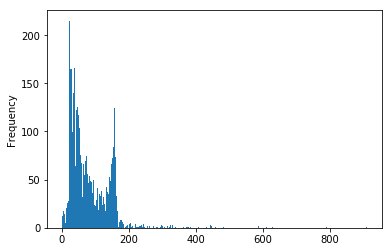

In [15]:
messeges['length'].plot.hist(bins=500)

In [16]:
messeges['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
messeges[messeges['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000240CF808D68>,
      dtype=object)

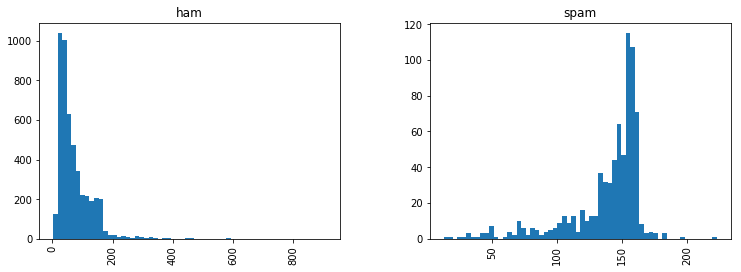

In [18]:
messeges.hist(column='length', by='label', bins=60,figsize=(12,4))

In [19]:
#split msg in individual word that return a list
#remove stop words
import string
string.punctuation
mess='Simple message! Notice : it has punctuation.'

In [20]:
nopunc = [c for c in mess if c not in string.punctuation]

In [21]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [22]:
nopunc=''.join(nopunc) #this join every element 
nopunc

'Simple message Notice  it has punctuation'

In [23]:
nopunc.split()
nopunc.lower()

'simple message notice  it has punctuation'

In [24]:
clean_mes=[word for word in nopunc.split() if word.lower not in stopwords.words('english')]
clean_mes

['Simple', 'message', 'Notice', 'it', 'has', 'punctuation']

In [33]:
# now all above in 1 fn
def text_process(mess):
    """
    1.remove punc
    2.remove stop words
    3.retun list of clean words
    """
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc=''.join(nopunc)
    clean_mes=[word for word in nopunc.split() if word.lower not in stopwords.words('english')]
    return clean_mes


In [34]:
messeges.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
messeges['message'].head(3).apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
Name: message, dtype: object

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_w=CountVectorizer(analyzer=text_process).fit(messeges['message'])

In [39]:
print(len(bag_of_w.vocabulary_))

11747


In [40]:
mess1=messeges['message'][3]
print(mess1)

U dun say so early hor... U c already then say...


In [47]:
bow1=bag_of_w.transform([mess1])
print(bow1)
print(bow1.shape)
print(bag_of_w.get_feature_names()[9832]) #call 2 times
print(bag_of_w.get_feature_names()[4221])

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1
(1, 11747)
say
U


In [50]:
mess_bow=bag_of_w.transform(messeges['message'])

Shape of Sparse Matrix :  (5572, 11747)


79463

In [51]:
print('Shape of Sparse Matrix : ',mess_bow.shape)
mess_bow.nnz #non zero ocourences

Shape of Sparse Matrix :  (5572, 11747)


79463

In [54]:
#sparsity tell how many zeros messages in matrix
sparsity=(100.0*mess_bow.nnz/(mess_bow.shape[0]*mess_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))
print('sparsity: {}'.format(sparsity))

sparsity: 0
sparsity: 0.12140229049026034


In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(mess_bow)
tfid1=tfidf_transformer.transform(bow1)
print(tfid1)

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [57]:
tfidf_transformer.idf_[bag_of_w.vocabulary_['university']]

8.527076498901426

In [58]:
messages_tfidf=tfidf_transformer.transform(mess_bow)

In [60]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(messages_tfidf,messeges['label'])
spam_detect_model.predict(tfid1)[0]

'ham'

In [61]:
messeges['label'][3]

'ham'

In [62]:
all_pred=spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [66]:
from sklearn.model_selection import train_test_split
x=messeges['message']
y=messeges['label']
msg_train,msg_test,label_train,label_test=train_test_split(x,y,test_size=.3,random_state=42)

In [67]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('bag',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())])
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bag', CountVectorizer(analyzer=<function text_process at 0x00000240D02F50D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [68]:
pred=pipeline.predict(msg_test)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(label_test,pred))
print('\n')
print(classification_report(label_test,pred))

[[1448    0]
 [  84  140]]


             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1448
       spam       1.00      0.62      0.77       224

avg / total       0.95      0.95      0.94      1672



In [70]:
from sklearn import metrics
metrics.accuracy_score(label_test,pred)

0.9497607655502392